In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gradient_descent(a:int,b:int,lr:int,X:np.array,Y:np.array,n,max_steps:int,cost_func,grad_decr):
    """
    a,b : coeffs. inputs a,b are the initial coeffs which are assumed
    lr : learning rate
    X,Y : x,y values of points
    n : number of points
    Ɛ ~= 0 (some small value close to 0)

    returns : a,b
    """
    costs = []
    Ɛ = 10**-6
    cost = 1000
    for step in range(max_steps):
        a_prev,b_prev,cost_prev = a,b,cost
        
        Y_pred = a*X - b
        decr_a,decr_b = grad_decr(n,Y,Y_pred,X)

        a = a_prev - lr*decr_a
        b = b_prev - lr*decr_b

        cost = cost_func(X,Y,n,a,b)
        costs.append(cost)
        print(cost)
        if (cost)**2 < Ɛ: #  (a_prev -a)**2 + (b_prev-b)**2 
            break
    
    plt.scatter([_ for _ in range(len(costs))],costs)
    plt.title("value of cost function over time")
    plt.show()

    return a,b

In [4]:
def mse(x:np.array,y:np.array,n:int,a:float,b:float):
    return (1/n)*np.sum((y-(a*x+b))**2)

In [5]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return rss/tss

In [6]:
def grad_decr_least_squares(n,Y,Y_pred,X):
    return \
        (-2/n)*np.sum((Y-Y_pred)*X), \
        (2/n)*np.sum(Y-Y_pred)

In [7]:
def grad_decr_r_squared(n,Y,Y_pred,X):
    y_mean = np.sum(Y)/n
    tss = np.sum((Y-y_mean)**2)

    return \
        (-2/tss)*np.sum((Y-Y_pred)*X), \
        (2/tss)*np.sum(Y-Y_pred)

In [8]:
X = np.array([1,2,3,4,5])
Y = np.array([2,4,6,8,10])

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

score_df = pd.read_csv("data/score.csv")
score_df

x_train,x_test,y_train,y_test = train_test_split(score_df["Hours"],score_df["Scores"],train_size=0.9,random_state=42)

In [10]:
X = x_train
Y = y_train

In [11]:
a,b = 0,-1
lr = 0.01
n = len(X)
max_steps = 2000

580.8172321496015
159.77097575491374
83.28594756382493
65.14420963276103
59.86238297157503
58.15439342276659
57.58043288458217
57.38758843708198
57.325632126165736
57.30896806901061
57.30800888930661
57.312489600231785
57.31884433892071
57.32583387338316
57.33302750660498
57.34027557688971
57.34752611340829
57.35476110445252
57.361974343113815
57.36916372594789
57.376328575811385
57.38346871121529
57.39058412281147
57.39767486093128
57.404740996492066
57.41178260740785
57.41879977386525
57.425792576682056
57.4327610967368
57.43970541477062
57.44662561131913
57.45352176668853
57.460393960948245
57.46724227392837
57.47406678521913
57.48086757417117
57.48764471989568
57.49439830126502
57.50112839691376
57.507835085238234
57.51451844439772
57.521178552314964
57.52781548667644
57.53442932493282
57.541020144299864
57.547588021758784
57.55413303405674
57.560655257707175
57.567154768990775
57.57363164395561
57.58008595841791
57.58651778796249
57.59292720794333
57.59931429348415
57.605679119478

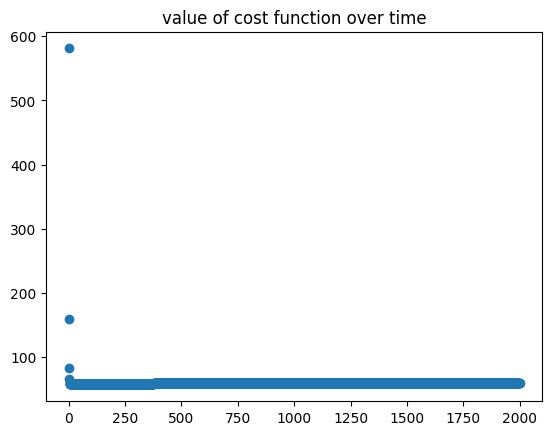

In [12]:
a,b = gradient_descent(a,b,lr,X,Y,n,max_steps,cost_func=mse,grad_decr=grad_decr_least_squares)

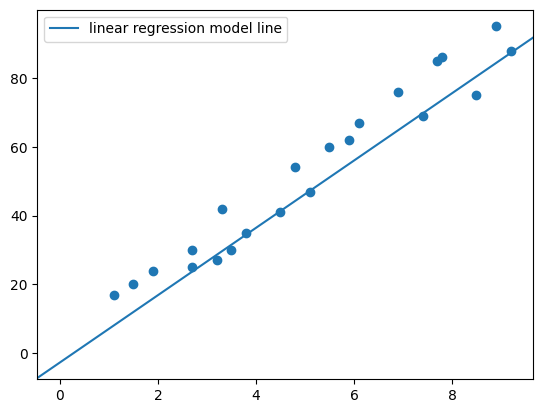

In [13]:
fig,ax  = plt.subplots()
ax.scatter(X,Y)
ax.axline((0,b),slope=a,color='C0',label='linear regression model line')

ax.legend()

plt.show()

In [14]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return 1 - rss/tss

Graphics utility

In [15]:
def plot_data(
    x, y, title, xlabel, ylabel, a_s=None, b_s=None, labels=None, colors=None
):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if a_s and b_s:
        if not labels:
            labels = ["" for a in a_s]
        if not colors:
            colors = ["C0" for a in a_s]
        # fig,ax  = plt.subplots()
        for a, b, color, label in zip(a_s, b_s, colors, labels):
            ax.axline((0, b), slope=a, color=color, label=label)
            ax.legend()

    fig.show()
    plt.show()

Modularization of steps for gradient descent

In [16]:
class StraightLinearRegressorGrad():
    def fit(self,x,y,init_a=-1,init_b=0,lr=0.05,n=None,max_steps=500,cost_func=mse,grad_decr=grad_decr_least_squares):
        if not n:
            n = len(x)
        
        self.a,self.b = gradient_descent(a=init_a,b=init_b,lr=lr,X=x,Y=y,n=n,max_steps=max_steps,cost_func=cost_func,grad_decr=grad_decr)

    def predict(self,x:np.array):
        # n = len(x)
        y = a*x + b
        return y

    def score(self,x,y):
        return r_squared(x,y,len(x),self.a,self.b)

Applications

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [18]:
score_df = pd.read_csv("data/score.csv")
score_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [19]:
x_train,x_test,y_train,y_test = train_test_split(score_df["Hours"],score_df["Scores"],test_size=0.5,random_state=42)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7276\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


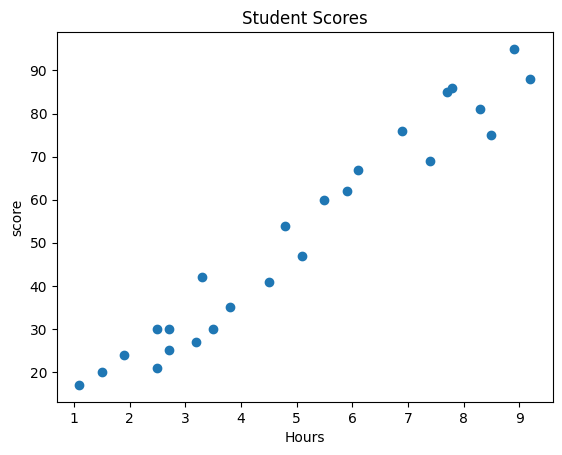

In [20]:
plot_data(score_df["Hours"],score_df["Scores"],title="Student Scores",xlabel="Hours",ylabel="score")

3446.1115184351847
2984.575706026119
2588.06777989888
2247.2606673359273
1954.1780931608478
1701.9979472290543
1484.8843518565814
1297.8442344024452
1136.604823771118
997.5090133781882
877.4259802625215
773.6748317476005
683.9593769269923
606.3123984468118
539.0480375580169
480.7211081689105
430.0923287271453
386.09860854063714
347.8276513127735
314.49624638164937
285.4317101154497
260.0560184311456
237.8722384386897
218.45292444736765
201.43019243855693
186.48722883375143
173.35102501315066
161.7861594603064
151.5894753836935
142.5855238466303
134.62266137766431
127.5697072080451
121.3130790956958
115.75433849140902
110.80808587758595
106.40015571437524
102.46606777735155
98.94969794835552
95.80213688335928
92.98070956193311
90.44813263621072
88.1717898406327
86.12310858040844
84.2770232576041
82.61151297972197
81.10720307835066
79.74702138919177
78.51590154725076
77.40052666447397
76.38910770915801
75.4711917205696
74.63749568846973
73.87976252279307
73.19063604824514
72.563552394538

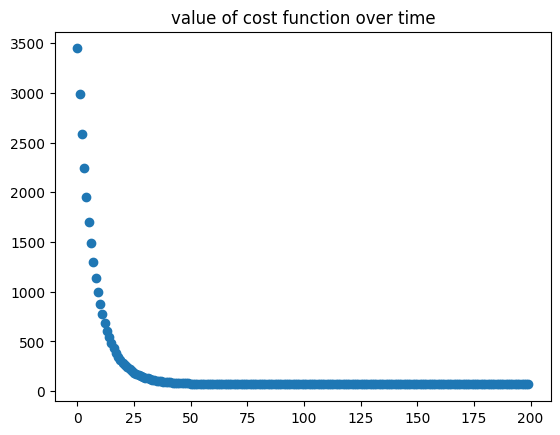

LinearRegression()

In [21]:
custom_reg = StraightLinearRegressorGrad()
custom_reg.fit(init_a=0,init_b=-1,lr=0.001,x=x_train,y=y_train,max_steps=200,cost_func=mse,grad_decr=grad_decr_least_squares)
"""
a,b = 0,-1
lr = 0.01
n = len(X)
max_steps = 2000
"""
sk_reg = LinearRegression()
sk_reg.fit([[x_i] for x_i in x_train],y_train)
#reg.intercept_,reg.coef_

In [22]:
print(custom_reg.a,custom_reg.b)

9.745914995446444 -2.7095466786294047


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7276\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


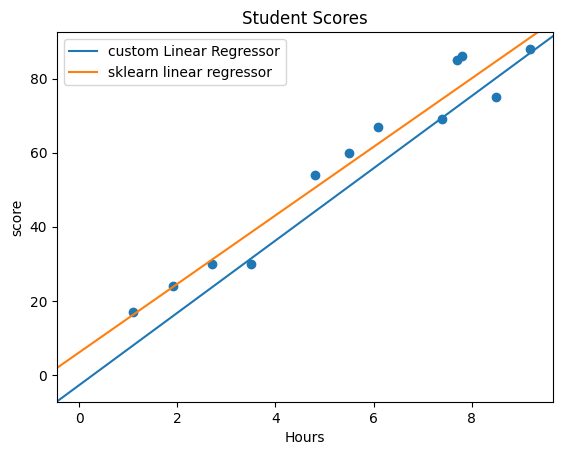

In [23]:
plot_data(x_train,y_train,title="Student Scores",xlabel="Hours",ylabel="score",a_s= [custom_reg.a,sk_reg.coef_[0]],b_s=[custom_reg.b,sk_reg.intercept_],labels=["custom Linear Regressor","sklearn linear regressor"],colors=['C0','C1'])

In [24]:
sk_reg.score([[xi] for xi in x_test],y_test)

0.9426307007429557

In [25]:
custom_reg.score(x_test,y_test)

0.916573118955085

In [26]:
salary_df = pd.read_csv("data/Salary_Data.csv")
salary_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [29]:
x_train,x_test,y_train,y_test = train_test_split(salary_df["YearsExperience"],salary_df["Salary"],test_size=0.5,random_state=42)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7276\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


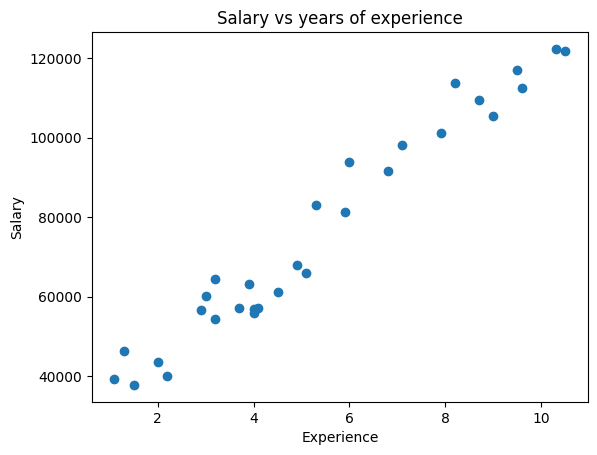

In [30]:
plot_data(salary_df["YearsExperience"],salary_df["Salary"],title="Salary vs years of experience",xlabel="Experience",ylabel="Salary")

5920934481.095902
5101444236.170563
4402523886.673454
3806253596.542357
3297390746.0861654
2862968947.960028
2491957193.7259846
2174970108.796031
1904021647.640755
1672315711.9813993
1474068152.7765424
1304355448.0968914
1158986055.4906
1034391037.9066929
927531072.5834926
835817386.05102
757044527.0387404
689333202.3946304
631081667.4131094
580924388.2962675
537696886.8336471
500405840.87892157
468203653.16007185
440366819.06566215
416277524.43329215
395407989.6872761
377307149.191699
361589316.323619
347924537.1622823
336030380.22159404
325664947.50432956
316620924.3301077
308720512.7370483
301811116.50337976
295761665.5955486
290459484.6466449
285807624.34779584
281722586.7734112
278132385.9799683
274974893.9903011
272196429.7331289
269750554.84796906
267597045.6562308
265701015.18259338
264032163.00782332
262564134.0478535
261273970.17171887
260141640.9671287
259149642.00026646
258282650.64953932
257527231.06709948
256871581.07584193
256305314.87623134
255819276.34475088
255405378.

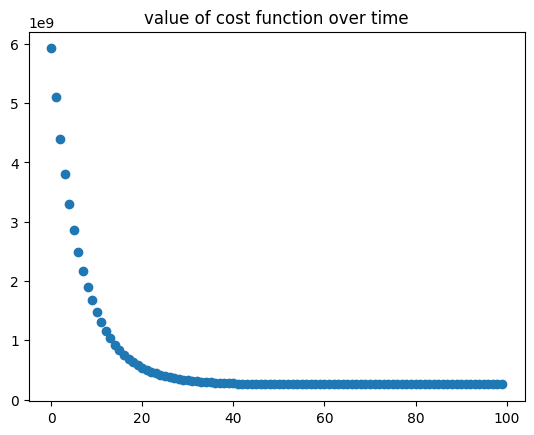

LinearRegression()

In [39]:
custom_reg = StraightLinearRegressorGrad()
custom_reg.fit(init_a=0,init_b=-1,lr=0.001,x=x_train,y=y_train,max_steps=100,cost_func=mse,grad_decr=grad_decr_least_squares)

sk_reg = LinearRegression()
sk_reg.fit([[x_i] for x_i in x_train],y_train)
#reg.intercept_,reg.coef_

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7276\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


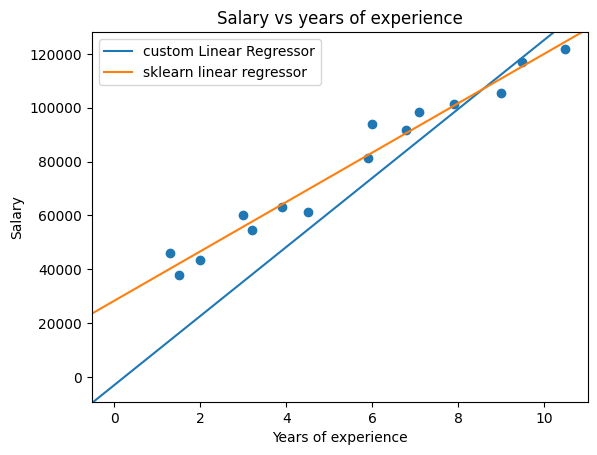

In [43]:
plot_data(x_train,y_train,title="Salary vs years of experience",xlabel="Years of experience",ylabel="Salary",a_s= [custom_reg.a,sk_reg.coef_[0]],b_s=[custom_reg.b,sk_reg.intercept_],labels=["custom Linear Regressor","sklearn linear regressor"],colors=['C0','C1'])

In [44]:
sk_reg.score([[xi] for xi in x_test],y_test)

0.940087016255447

In [45]:
custom_reg.score(x_test,y_test)

0.7024879851691122